In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import os
import json
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot

In [2]:
hists={}
pd = []
year = 'trig_2018'
dirname = '../grinder/pods/' + year
for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename: continue
    if '.pkl.gz' in filename:
        if filename.split("____")[0] not in pd: pd.append(filename.split("____")[0])
        with gzip.open(dirname+'/'+filename) as fin:
            hin = pickle.load(fin)
            for k in hin.keys():
                if k in hists: hists[k]+=hin[k]
                else: hists[k]=hin[k]


pdataset = hist.Cat("pdataset", "pdataset", sorting='placement')
pdataset_cats = ("dataset",)
pdataset_map = OrderedDict()

for pdi in pd:
    pdataset_map[pdi] = (pdi+"*",)

for key in hists.keys():
    hists[key] = hists[key].group(pdataset, pdataset_cats, pdataset_map)

scale={}
for pdi in hists['sumw'].identifiers('pdataset'):
    scale[pdi]=hists['sumw'].project('pdataset', pdi).values(overflow='all')[()][1]
    print(pdi,scale[pdi])

for key in hists.keys():
    if key=='sumw': continue
    for pdi in hists[key].identifiers('pdataset'):
        hists[key].scale({pdi:1/scale[pdi]},axis='pdataset')

ZH_HToBB_ZToLL_M125_13TeV_powheg_pythia8 558251.7187889507
GJets_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8 19051574.496664558
GJets_HT-600ToInf_TuneCP5_13TeV-madgraphMLM-pythia8 4970069.563275843
TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8 179747863920.7151
ggZH_HToBB_ZToLL_M125_13TeV_powheg_pythia8 26961.832887386823
WJetsToLNu_HT-800To1200_TuneCP5_13TeV-madgraphMLM-pythia8 8357921.270734889
DYJetsToLL_M-50_HT-600to800_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 8826238.149146453
WJetsToLNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8 5913597.7743131835
DYJetsToLL_M-50_HT-800to1200_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 3120982.1060653282
WJetsToLNu_HT-1200To2500_TuneCP5_13TeV-madgraphMLM-pythia8 7586023.159681609
ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8 266470421.9656856
DYJetsToLL_M-50_HT-2500toInf_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 415517.0219344224
DYJetsToLL_M-50_HT-400to600_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8 9614508.800390538
WW_Tun

In [3]:
data_hists={}

for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename:
        if '.pkl.gz' in filename:
            with gzip.open(dirname+'/'+filename) as fin:
                hin = pickle.load(fin)
                for k in hin.keys():
                    #if hin[k].identifiers('region')[0] not in 'isoneM': continue
                    if k in data_hists: data_hists[k]+=hin[k]
                    else: data_hists[k]=hin[k]

In [4]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("pdataset",)
process_map = OrderedDict()

#process_map["WW"] = ("WW*",)
#process_map["WZ"] = ("WZ*",)
process_map["Hbb"] = ("*HToBB*")
process_map["Zjets"] = ("DYJets*",)
process_map["Diboson"] = ("*_TuneCP5_13TeV-pythia8",)
process_map["ST"] = ("ST*",)
process_map["TT"] = ("TT*",)
process_map["Wjets"] = ("WJets*",)

#process_map["Znunu"] = ("ZJets*",)

#data_r_map['isoneE'] = 'SingleElectron'
#data_r_map['isoneM'] = 'MET'
#data_r_map['istwoE'] = 'SingleElectron'
#data_r_map['istwoM'] = 'MET'
#data_r_map['isoneA'] = 'SinglePhoton'
#data_r_map['iszeroL'] = 'MET'

data_map = OrderedDict()
data_map["MET"] = ("MET*", )
data_map["SingleElectron"] = ("EGamma*", )
data_map["SinglePhoton"] = ("EGamma*", )
data_cats = ("dataset",)
for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)
    print(key)
    data_hists[key] = data_hists[key].group(process, data_cats, data_map)

print(hists['recoil'].identifiers('process'))

sumw
CaloMinusPfOverRecoil
recoil
mindphi
j1pt
j1eta
j1phi
fj1pt
fj1eta
fj1phi
njets
nfjets
fjmass
e1pt
e1eta
e1phi
mu1pt
mu1eta
mu1phi
TvsQCD
hSvsQCD
VvsQCD
['Hbb', 'Zjets', 'Diboson', 'ST', 'TT', 'Wjets']


In [5]:
hists['recoil'].axis('recoil').label = 'Hadronic Recoil (GeV)'
hists['fj1pt'].axis('fj1pt').label = 'AK15 Leading Jet Pt (GeV)'
hists['j1pt'].axis('j1pt').label = 'AK4 Leading Jet Pt (GeV)'
hists['fjmass'].axis('fjmass').label = 'AK15 Leading Jet Mass (GeV)'

In [6]:
hists['recoil'].project('process','Hbb').values()

{('iszeroL',
  'baggy'): array([3.22183644e+00, 1.83736416e+00, 1.11686902e+00, 6.94114070e-01,
        4.80358198e-01, 2.76464965e-01, 2.48705974e-01, 1.33996432e-01,
        8.15324132e-02, 5.01653805e-02, 5.69716993e-02, 1.31798438e-02,
        1.36982348e-02, 1.22920379e-02, 2.18143577e-03, 1.01376835e-02,
        2.79856761e-03, 0.00000000e+00, 0.00000000e+00, 2.77401881e-03,
        0.00000000e+00]),
 ('iszeroL',
  'skinny'): array([3.29574366e+00, 1.88656185e+00, 1.18574097e+00, 7.43370416e-01,
        4.18818568e-01, 2.92836213e-01, 2.52812042e-01, 1.54996591e-01,
        9.10892953e-02, 4.86818776e-02, 3.77673576e-02, 2.28597858e-03,
        5.21402897e-03, 5.51675001e-03, 1.33703305e-02, 2.79856761e-03,
        0.00000000e+00, 8.31886501e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]),
 ('iszeroL',
  'inclusive'): array([6.51758010e+00, 3.72392601e+00, 2.30260999e+00, 1.43748449e+00,
        8.99176766e-01, 5.69301178e-01, 5.01518016e-01, 2.88993023e-01,
       

In [7]:
data_map['isoneE'] = 'SingleElectron'
data_map['isoneM'] = 'MET'
data_map['istwoE'] = 'SingleElectron'
data_map['istwoM'] = 'MET'
data_map['isoneA'] = 'SinglePhoton'
data_map['iszeroL'] = 'MET'

for r in hists['recoil'].identifiers('region'):
   exp = 0
   print('------------------')
   print('------------------')
   print('Category:',r)
   print('------------------')
   for p in hists['recoil'].identifiers('process'):
        for s in hists['recoil'].identifiers('jet_selection'):
            #print (hists['recoil'])
            #print (r,p,s,hists['recoil'].project('jet_selection',s).project('region',r).project('process', p).values(overflow='all'))
            yld = np.sum(hists['recoil'].project('jet_selection',s).project('region',r).project('process', p).values(overflow='all')[()])
            exp += yld
            print(p, '%.1f' % yld)        
   print('------------------')
   print('Total expected:', '%.1f' % exp)
   print('Total observed:', '%.1f' % np.sum(data_hists['recoil'].project('jet_selection',s).project('region',r).project('process', data_map[r]).values(overflow='all')[()]))
   print('------------------')
   print('------------------')
   print() 

------------------
------------------
Category: isoneE
------------------
Hbb 0.2
Hbb 0.4
Hbb 0.2
Zjets 61.2
Zjets 88.1
Zjets 26.9
Diboson 23.4
Diboson 30.7
Diboson 7.2
ST 9.6
ST 21.4
ST 11.8
TT 111.1
TT 278.1
TT 167.0
Wjets 1270.2
Wjets 1698.4
Wjets 428.3
------------------
Total expected: 4234.0
Total observed: 1454.0
------------------
------------------

------------------
------------------
Category: isoneM
------------------
Hbb 2.3
Hbb 4.7
Hbb 2.5
Zjets 707.5
Zjets 1017.1
Zjets 309.6
Diboson 325.5
Diboson 533.0
Diboson 207.6
ST 349.4
ST 748.6
ST 399.2
TT 3707.8
TT 9543.7
TT 5836.0
Wjets 13310.9
Wjets 17807.6
Wjets 4496.7
------------------
Total expected: 59309.6
Total observed: 14268.9
------------------
------------------

------------------
------------------
Category: istwoE
------------------
Hbb 0.0
Hbb 0.0
Hbb 0.0
Zjets 26.8
Zjets 37.6
Zjets 10.8
Diboson 0.0
Diboson 0.9
Diboson 0.9
ST 0.2
ST 0.3
ST 0.1
TT -0.1
TT -0.7
TT -0.6
Wjets 0.1
Wjets 0.5
Wjets 0.4
----------------

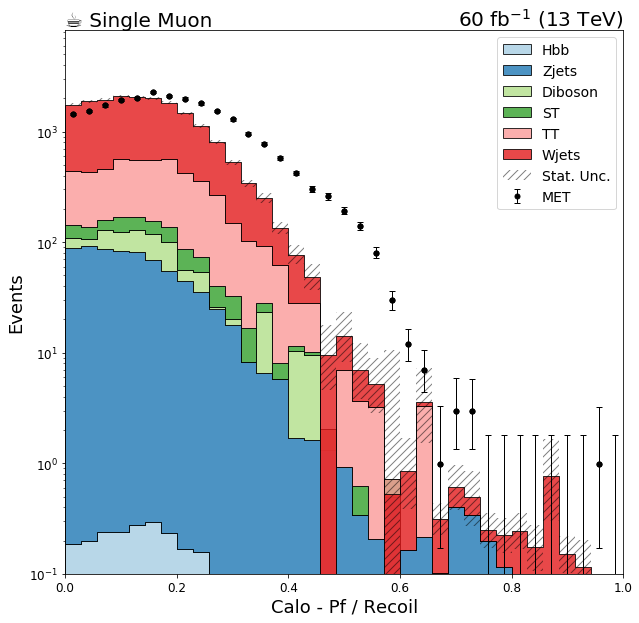

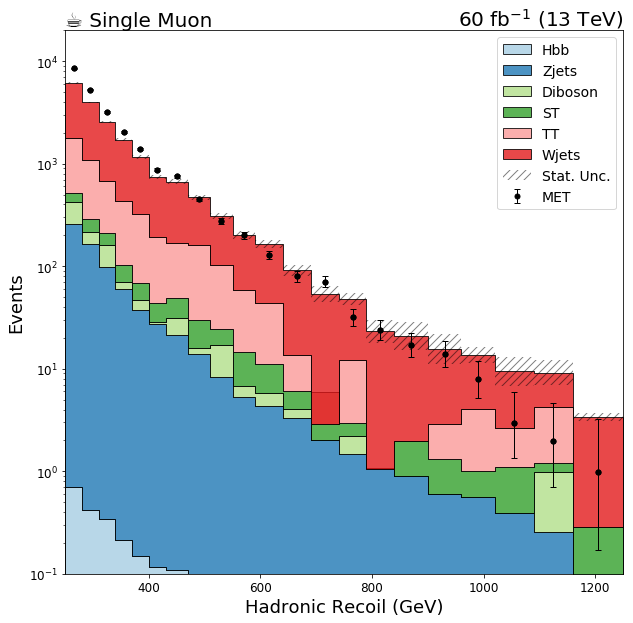

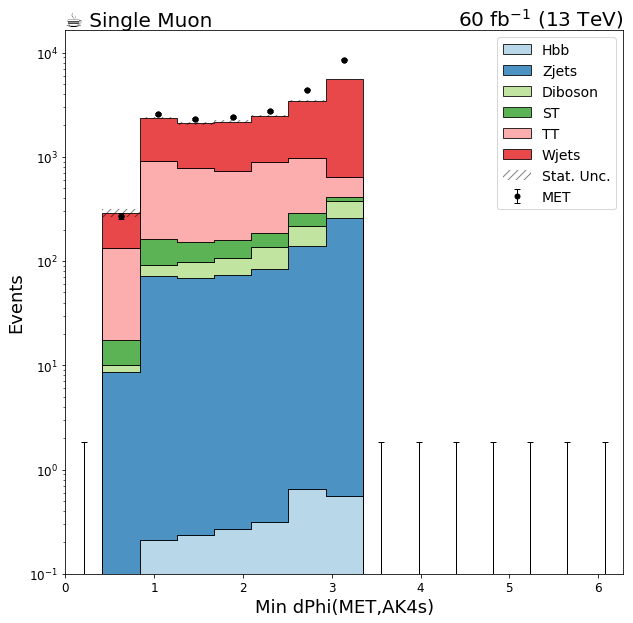

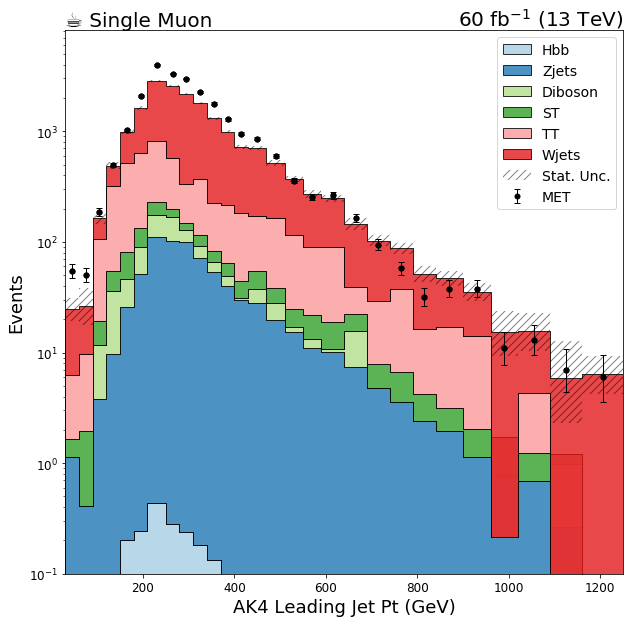

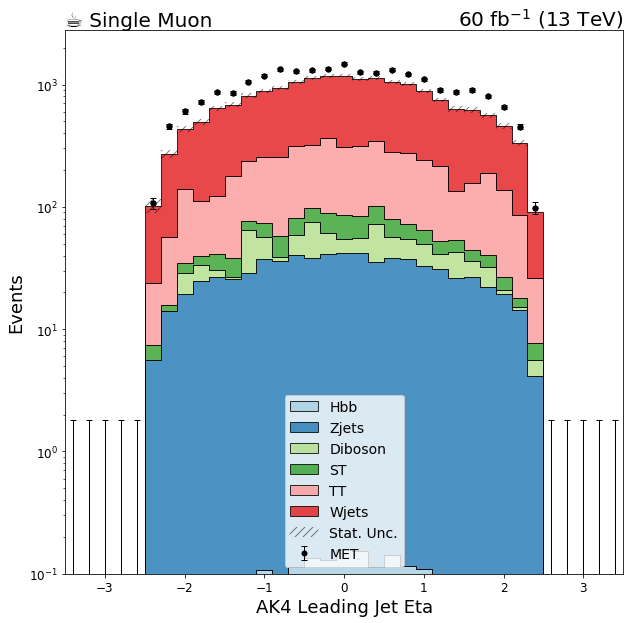

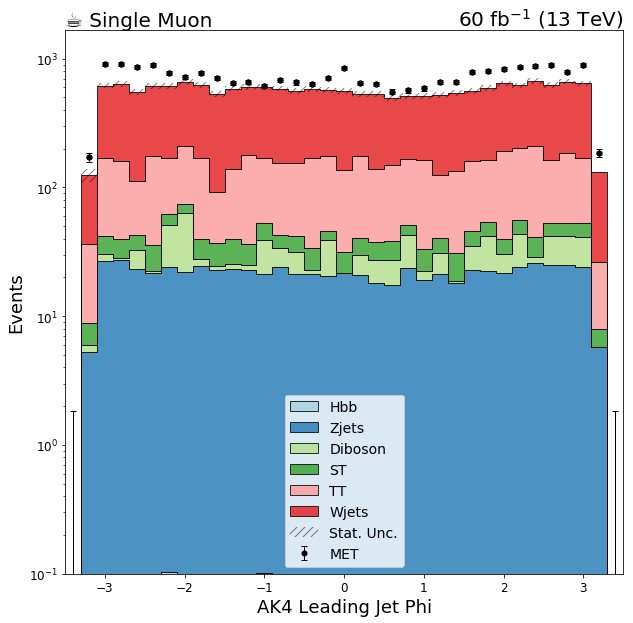

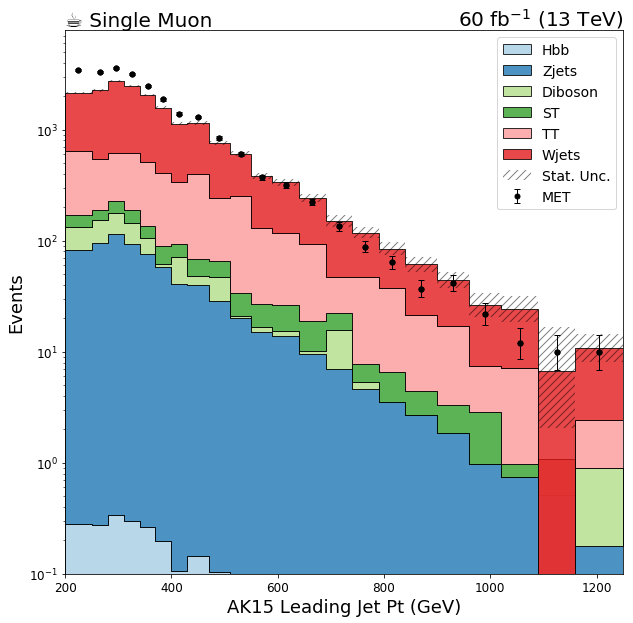

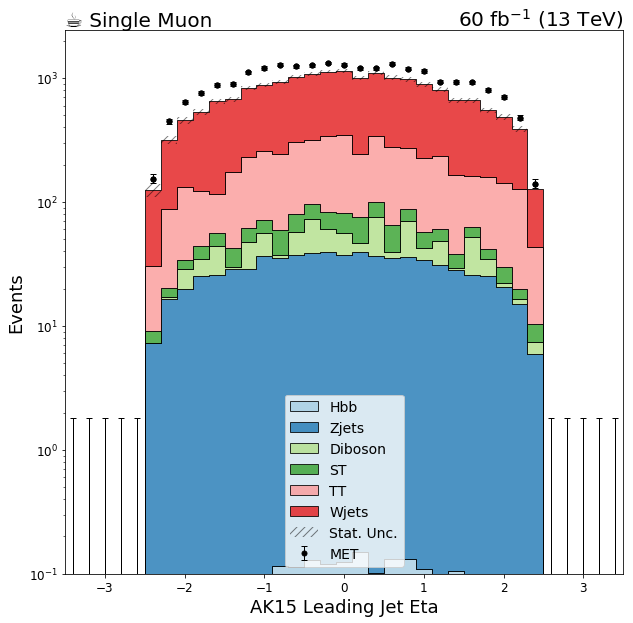

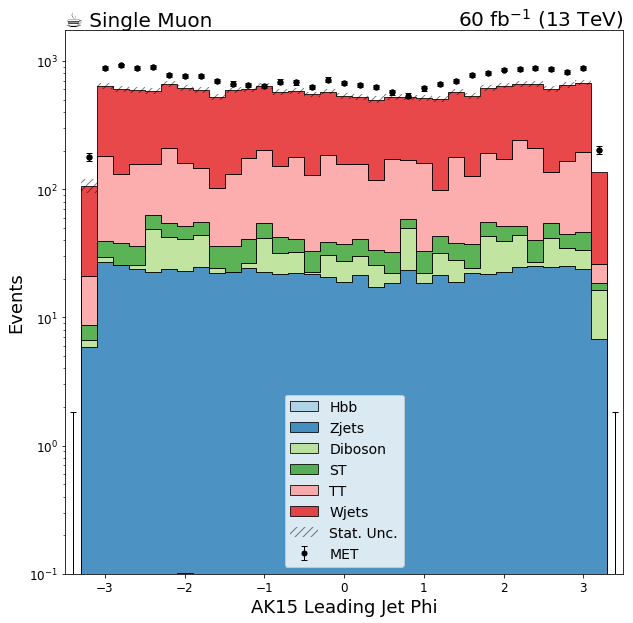

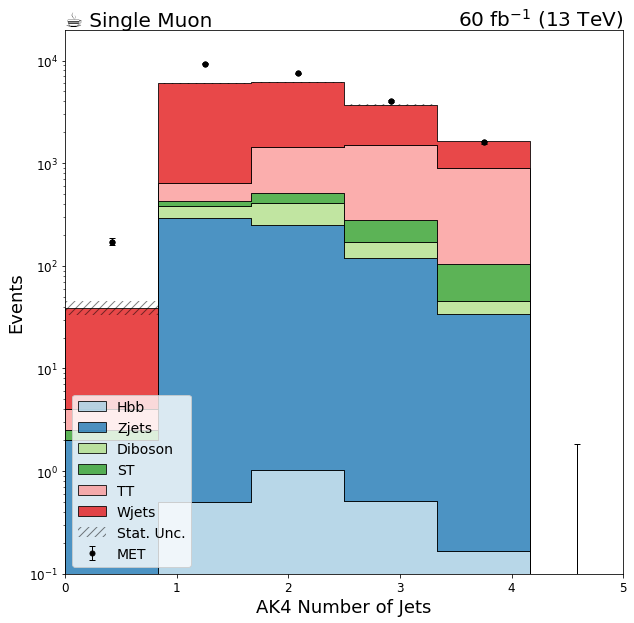

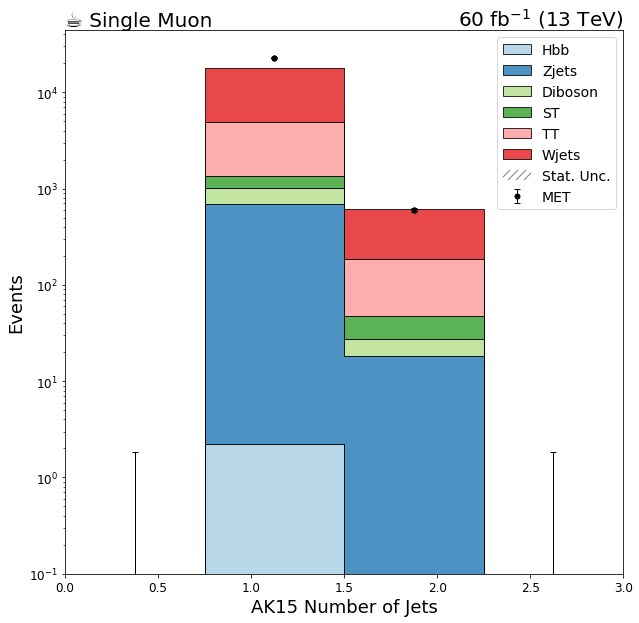

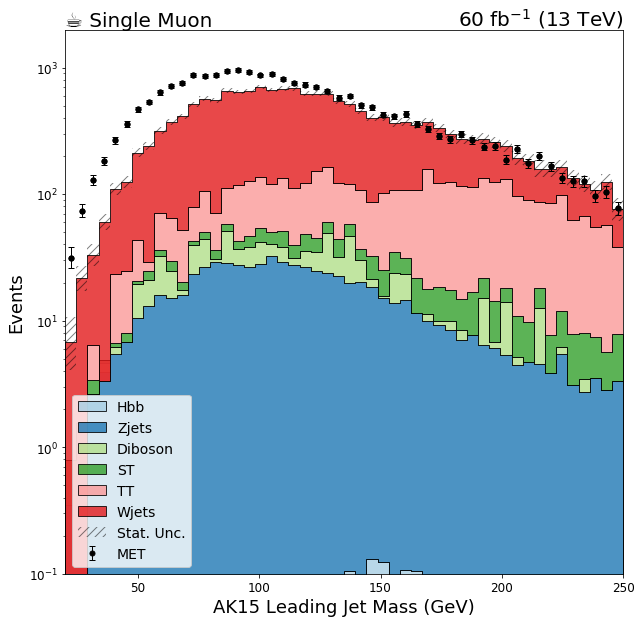

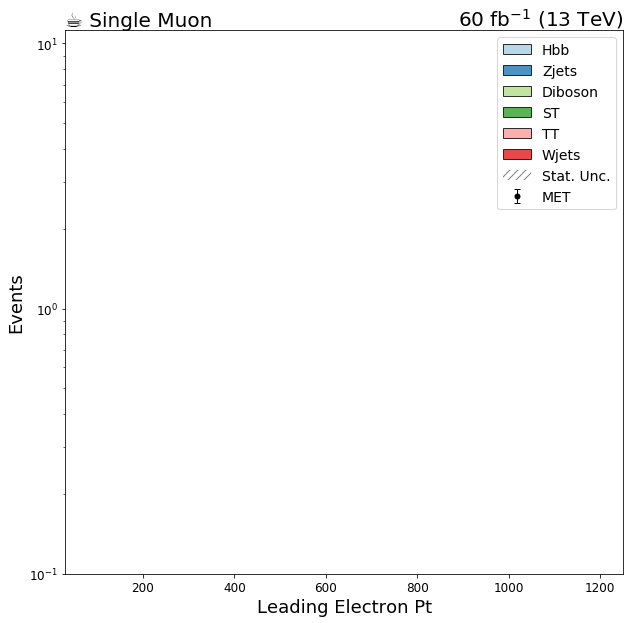

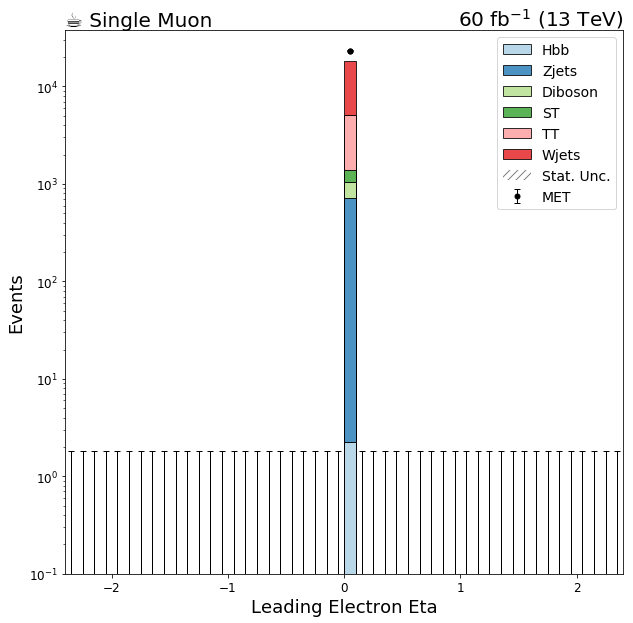

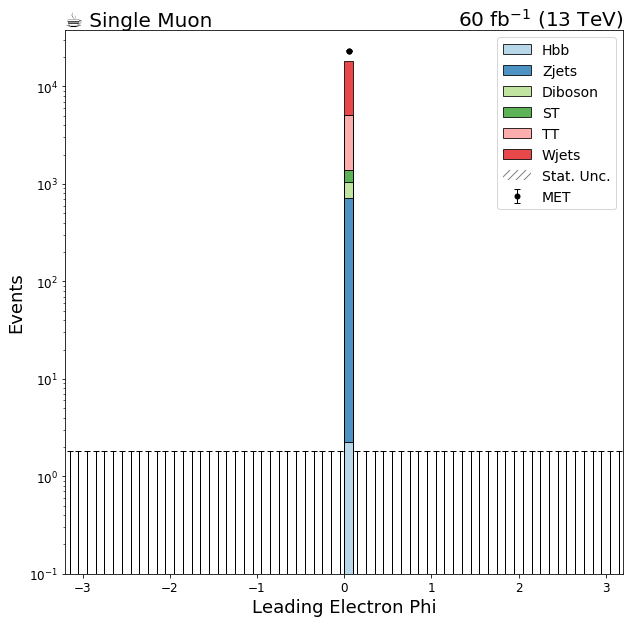

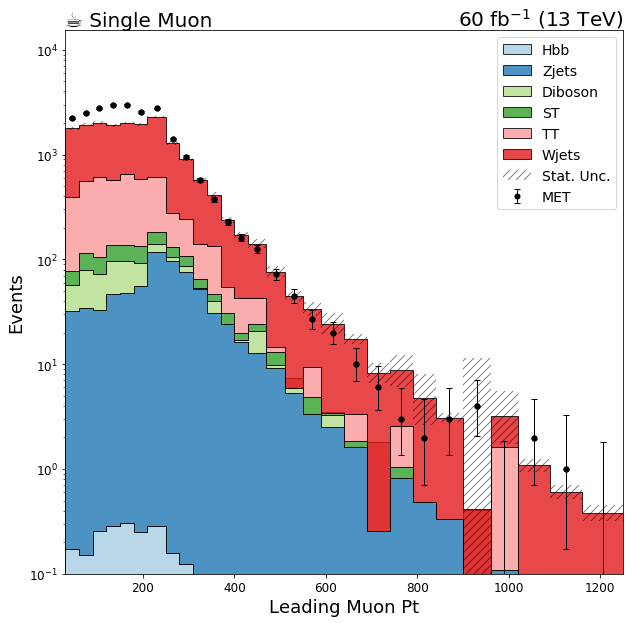

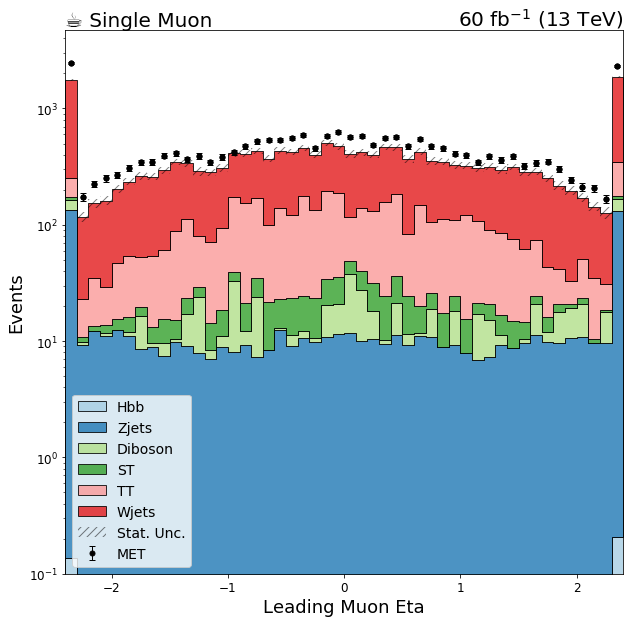

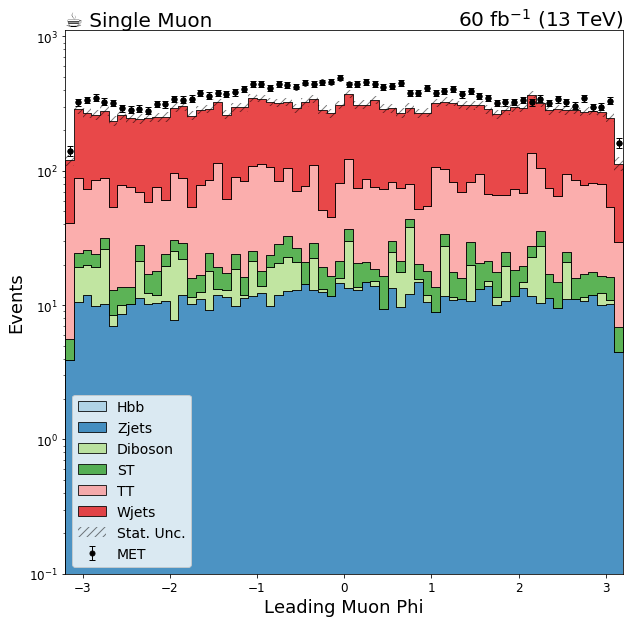

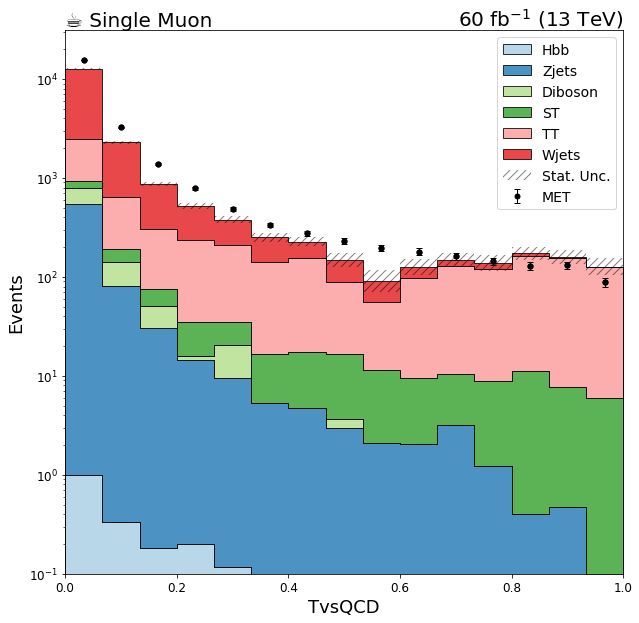

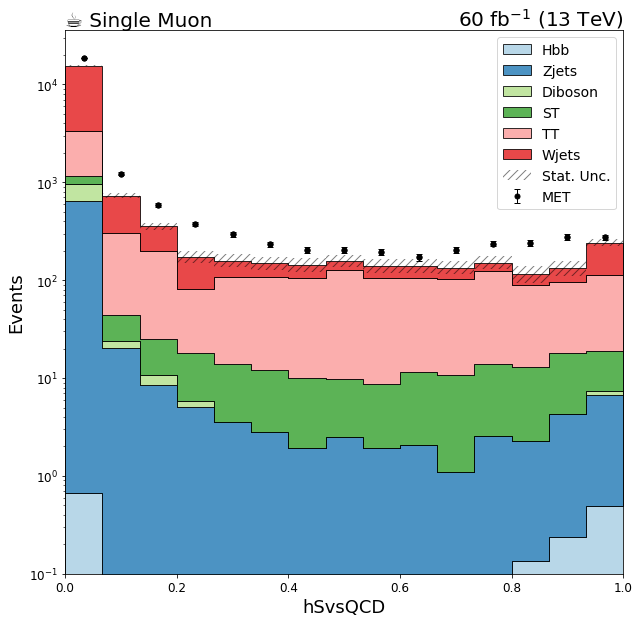

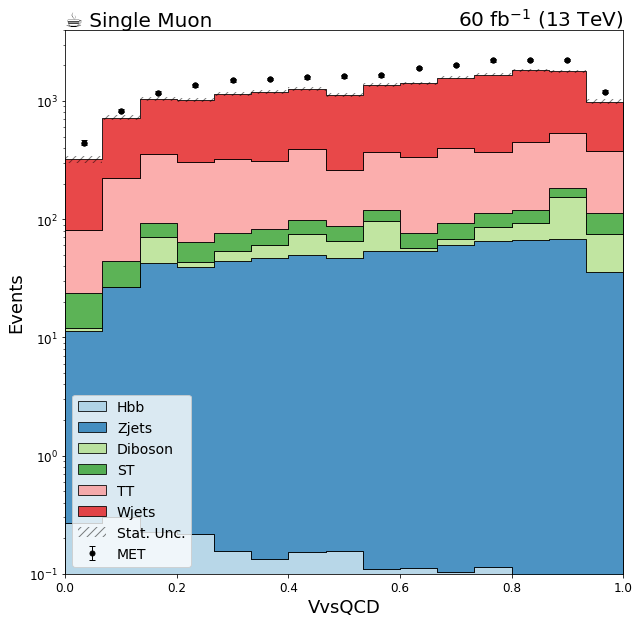

In [10]:
from cycler import cycler

plt.rcParams.update({'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']

if not os.path.exists('stack'):
    os.makedirs('stack')

for key in hists.keys():
    if key=='sumw': continue
    
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    
    plot.plot1d(data_hists[key].project('jet_selection','baggy').project('region','isoneM'),
            overlay="process",
            ax=ax,
            clear=False,
            error_opts=data_err_opts
               )
    plot.plot1d(hists[key].project('jet_selection','baggy').project('region','isoneM'),
            overlay="process",
            ax=ax,clear=False,
            stack=True,
            line_opts=None,
            fill_opts=fill_opts,
            error_opts=error_opts)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕ Single Muon", fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"60 fb$^{-1}$ (13 TeV)", fontsize=20, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
# save stack
    plot_path = os.path.abspath('stack') 
    plot_name = 'stack'+key+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))

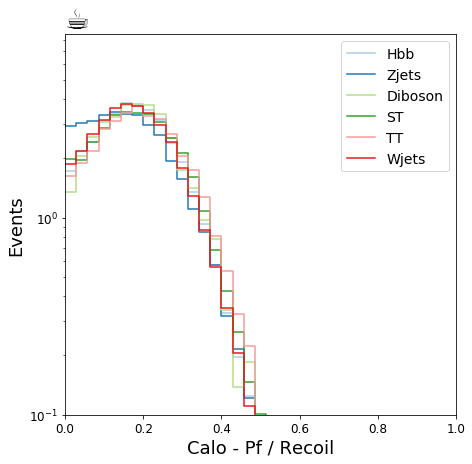

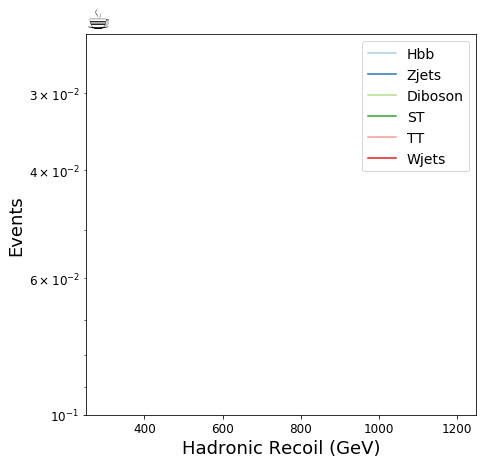

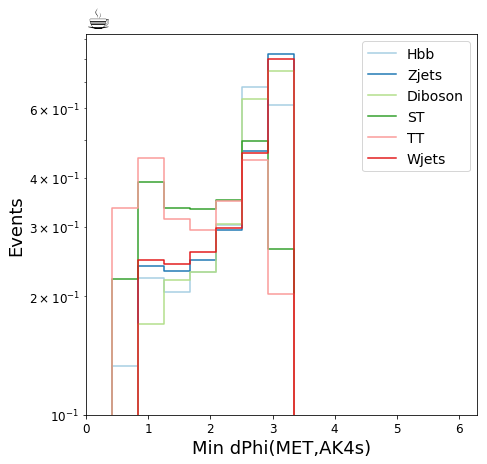

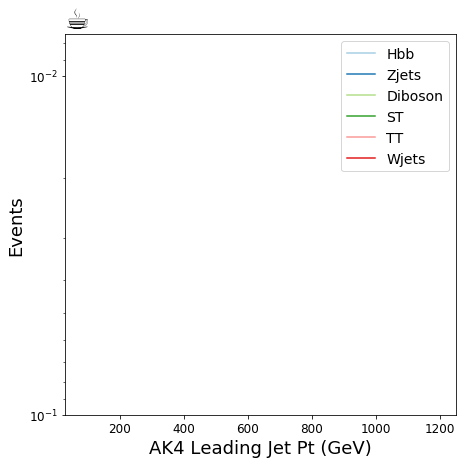

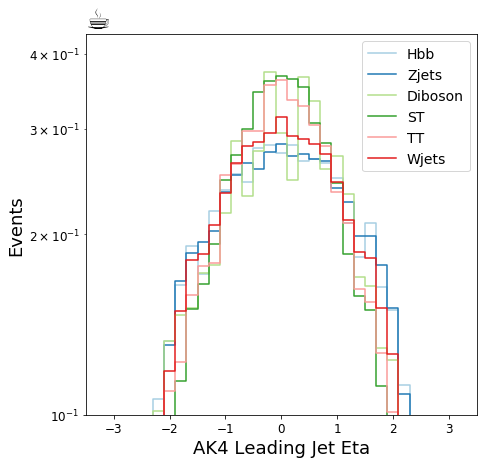

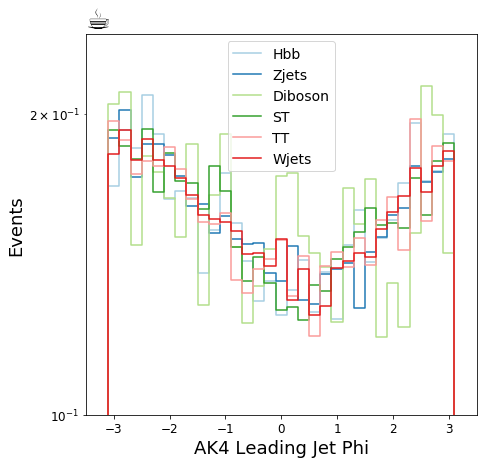

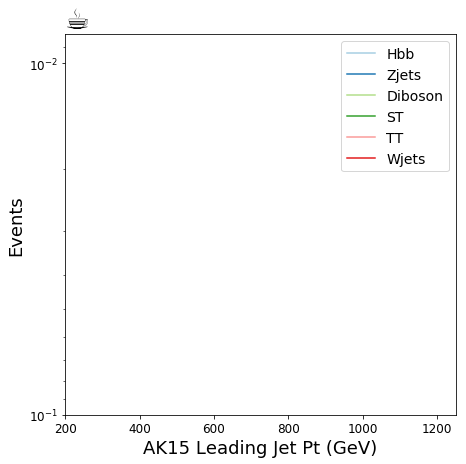

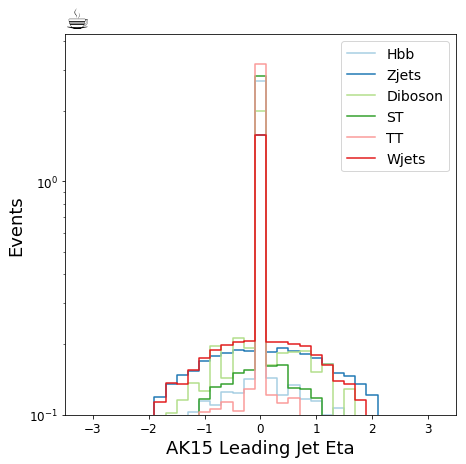

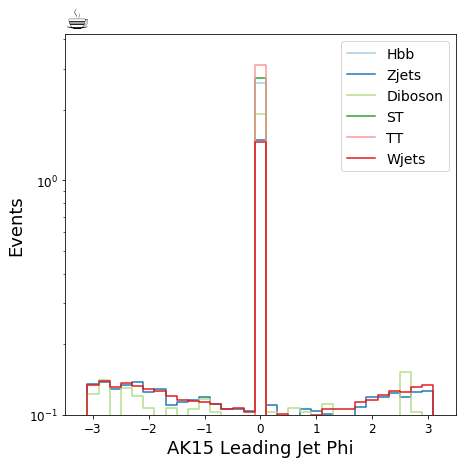

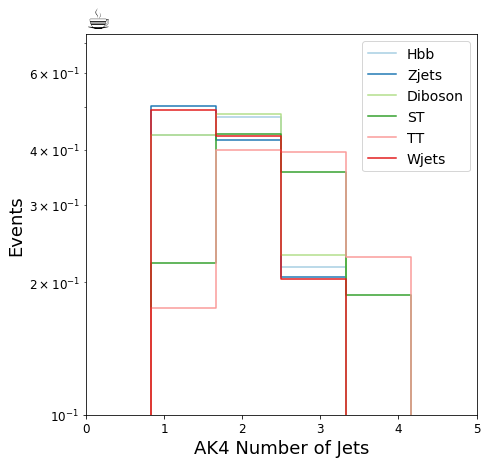

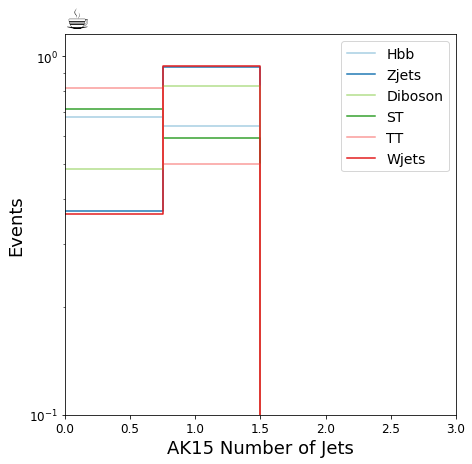

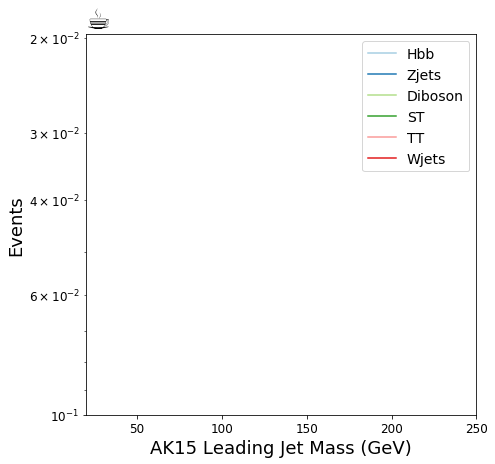

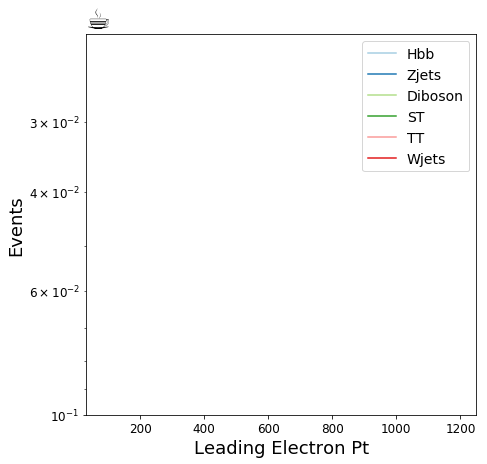

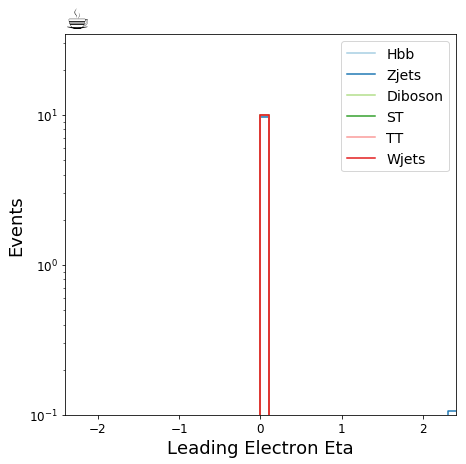

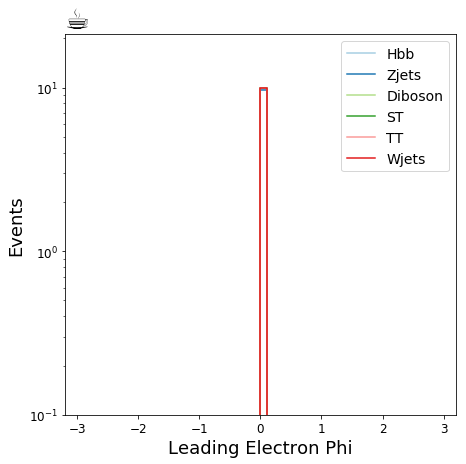

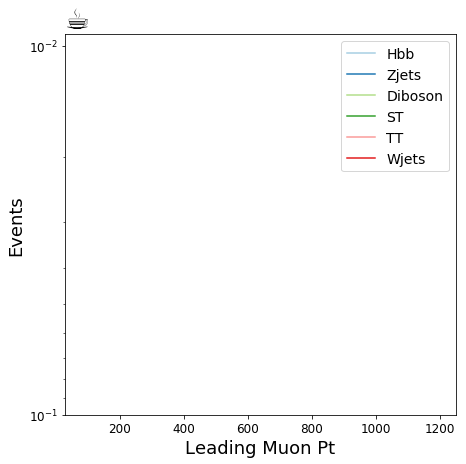

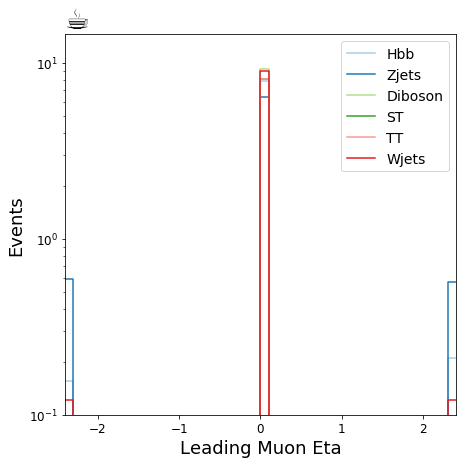

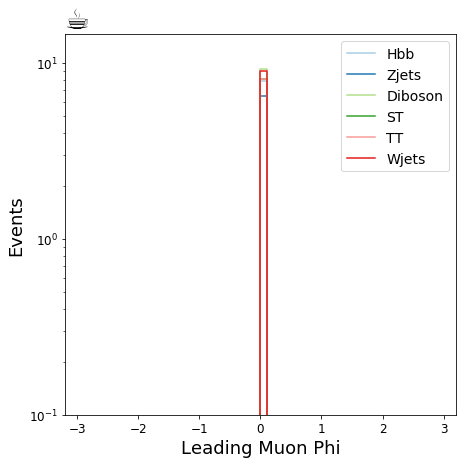

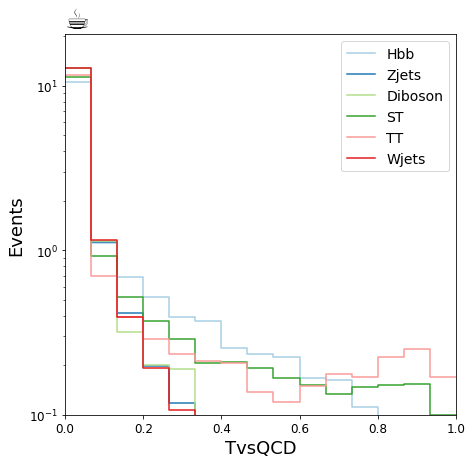

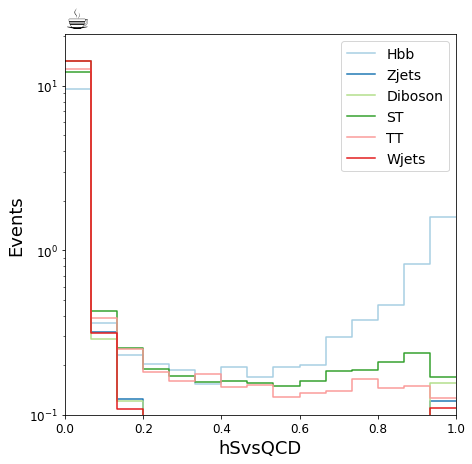

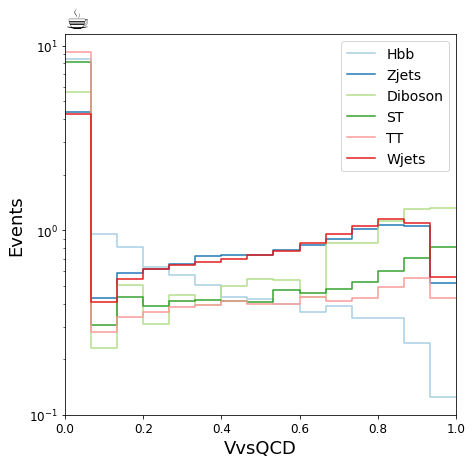

In [11]:
for key in hists.keys():
    if key=='sumw': continue

    fig, ax = plt.subplots(1, 1, figsize=(7,7))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(hists[key].project('jet_selection').project('region'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    #lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)

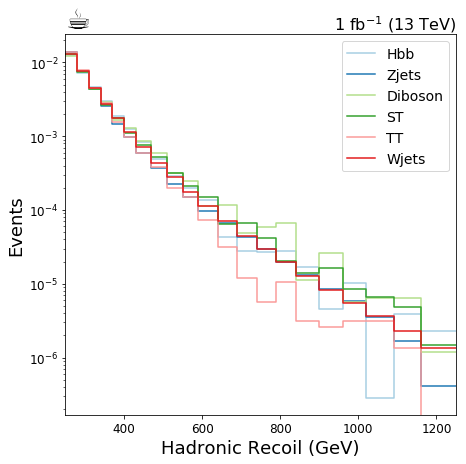

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.set_prop_cycle(cycler(color=colors))
plot.plot1d(hists["recoil"].project('jet_selection').project('region'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
ax.autoscale(axis='x', tight=True)
ax.set_yscale('log')
leg = ax.legend()
coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)